In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

## Import Parquet Dataset and EDA

In [2]:
path = '../data/parquet/'
all_files = glob.glob(os.path.join(path, '*.parquet'))

li = []

for filename in all_files:
    df = pd.read_parquet(filename)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)
df['label_binary'] = df['label_tactic'].apply(lambda x: False if x == 'none' else True)

In [3]:
df.head(10)

,resp_pkts,service,orig_ip_bytes,local_resp,missed_bytes,proto,duration,conn_state,dest_ip_zeek,orig_pkts,...,local_orig,datetime,history,resp_bytes,uid,src_port_zeek,ts,src_ip_zeek,label_tactic,label_binary
0,2620,ssh,277936,False,44,tcp,4132.060737,S1,143.88.9.13,4032,...,False,2022-02-19 12:18:28.457,ShADTadtTttTGtT,47316.0,Cg4R1LqazmXBKwYX2,45424,1.645273e+09,143.88.4.15,Defense Evasion,True
1,2620,ssh,277936,False,44,tcp,4132.060737,S1,143.88.9.13,4032,...,False,2022-02-19 12:18:28.457,ShADTadtTttTGtT,47316.0,Cg4R1LqazmXBKwYX2,45424,1.645273e+09,143.88.4.15,Initial Access,True
2,2620,ssh,277936,False,44,tcp,4132.060737,S1,143.88.9.13,4032,...,False,2022-02-19 12:18:28.457,ShADTadtTttTGtT,47316.0,Cg4R1LqazmXBKwYX2,45424,1.645273e+09,143.88.4.15,Persistence,True
3,2620,ssh,277936,False,44,tcp,4132.060737,S1,143.88.9.13,4032,...,False,2022-02-19 12:18:28.457,ShADTadtTttTGtT,47316.0,Cg4R1LqazmXBKwYX2,45424,1.645273e+09,143.88.4.15,Privilege Escalation,True
4,64,ssh,11824,False,0,tcp,17.406988,SF,143.88.10.11,84,...,False,2022-02-18 10:16:57.899,ShADTadtTtFRf,2172.0,CIvLhX2VxjWEcHN66c,59554,1.645179e+09,143.88.5.17,Exfiltration,True
5,52,ssh,10192,False,0,tcp,10.058048,RSTO,143.88.10.11,64,...,False,2022-02-18 10:18:09.157,ShADTadtTtFR,2068.0,C6Q8e04RGnomF6y7ek,59556,1.645179e+09,143.88.5.17,Exfiltration,True
6,52,None,3992,False,0,tcp,184.570311,OTH,143.88.10.11,72,...,False,2022-02-18 10:13:16.712,DTdtAaTt,251.0,CCxYpH2DTFBJSAxJOi,4444,1.645179e+09,143.88.5.17,Exfiltration,True
7,16,http,2880,False,0,tcp,6.360564,SF,143.88.10.11,24,...,False,2022-02-18 10:42:43.543,ShADTadtFf,502.0,CzZFJg1vQmmRDsbFRh,50498,1.645181e+09,143.88.5.17,Exfiltration,True
8,16,http,3628,False,0,tcp,5.005727,SF,143.88.10.11,24,...,False,2022-02-18 10:42:52.213,ShADTadtFf,438.0,CjGDVa3t5qscalTdT8,50500,1.645181e+09,143.88.5.17,Exfiltration,True
9,76,ssh,13504,False,0,tcp,43.776562,SF,143.88.10.11,92,...,False,2022-02-18 10:43:43.425,ShADTadtTtFf,2224.0,CPgkuw4NLCeuoi4438,59562,1.645181e+09,143.88.5.17,Exfiltration,True


array([[<Axes: title={'center': 'resp_pkts'}>,
        <Axes: title={'center': 'orig_ip_bytes'}>,
        <Axes: title={'center': 'missed_bytes'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'orig_pkts'}>,
        <Axes: title={'center': 'resp_ip_bytes'}>],
       [<Axes: title={'center': 'dest_port_zeek'}>,
        <Axes: title={'center': 'orig_bytes'}>,
        <Axes: title={'center': 'datetime'}>],
       [<Axes: title={'center': 'resp_bytes'}>,
        <Axes: title={'center': 'src_port_zeek'}>,
        <Axes: title={'center': 'ts'}>]], dtype=object)

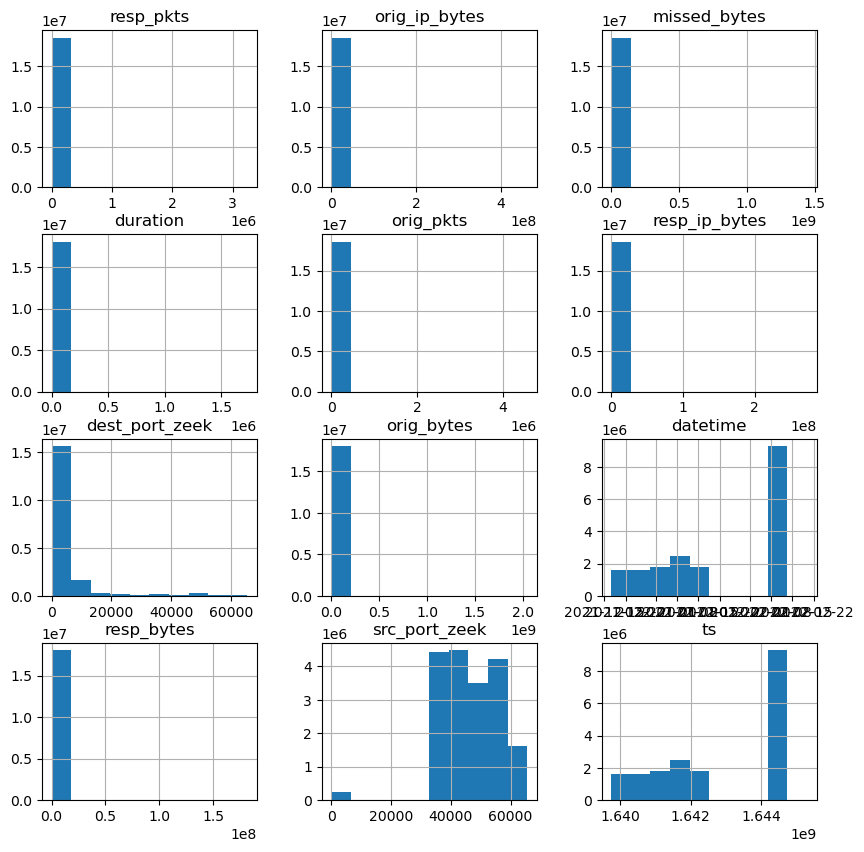

In [4]:
df.hist(figsize=(10, 10))

In [5]:
df.describe()

,resp_pkts,orig_ip_bytes,missed_bytes,duration,orig_pkts,resp_ip_bytes,dest_port_zeek,orig_bytes,resp_bytes,src_port_zeek,ts
count,1.856247e+07,1.856247e+07,1.856247e+07,1.805299e+07,1.856247e+07,1.856247e+07,1.856247e+07,1.805299e+07,1.805299e+07,1.856247e+07,1.856247e+07
mean,1.699961e+00,2.856380e+02,1.848343e+05,1.801780e+00,4.042430e+00,1.518176e+02,4.056021e+03,1.989344e+05,7.016080e+01,4.647348e+04,1.642911e+09
std,1.317025e+03,1.560855e+05,1.221970e+07,1.441099e+03,1.699689e+03,1.186923e+05,1.013671e+04,1.593369e+07,7.545051e+04,1.000777e+04,1.797027e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,9.536743e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.639746e+09
25%,0.000000e+00,1.340000e+02,0.000000e+00,1.597404e-05,2.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,3.910000e+04,1.641332e+09
50%,0.000000e+00,1.580000e+02,0.000000e+00,1.840591e-04,3.000000e+00,0.000000e+00,5.300000e+01,0.000000e+00,0.000000e+00,4.599800e+04,1.642396e+09
75%,0.000000e+00,1.800000e+02,0.000000e+00,4.858971e-04,4.000000e+00,0.000000e+00,3.071000e+03,8.600000e+01,0.000000e+00,5.428600e+04,1.644674e+09
max,3.246010e+06,4.622475e+08,1.444335e+09,1.731504e+06,4.576716e+06,2.726648e+08,6.538900e+04,2.046448e+09,1.817766e+08,6.553500e+04,1.645298e+09


In [6]:
for col in df.select_dtypes(include=['object']):
    print(f"{col}: {df[col].unique()}")

service: ['ssh' None 'http' 'ssl' 'ftp' 'smb,gssapi,ntlm' 'gssapi,smb,ntlm'
 'gssapi,ntlm,smb' 'dns' 'ntp' 'radius' 'dhcp' 'krb_tcp' 'smb'
 'smb,ntlm,gssapi' 'gssapi']
proto: ['tcp' 'udp' 'icmp']
conn_state: ['S1' 'SF' 'RSTO' 'OTH' 'RSTR' 'S0' 'S3' 'SHR' 'RSTRH' 'SH' 'REJ']
dest_ip_zeek: ['143.88.9.13' '143.88.10.11' '143.88.4.11' '143.88.10.14' '143.88.8.12'
 '143.88.4.15' '143.88.3.12' '143.88.5.17' '143.88.255.10' '143.88.11.14'
 'ff02::1:2' '143.88.11.1' '8.8.8.8' '8.8.4.4' '172.28.128.255'
 '143.88.11.255' '10.0.10.1' '143.88.0.41' '202.12.27.33' 'ff02::1:3'
 '224.0.0.252' '224.0.0.251' 'ff02::16' '192.33.4.12' 'ff02::2'
 'fe80::250:56ff:fe9e:ef90' 'fe80::250:56ff:fe9e:da15' '193.0.14.129'
 '192.36.148.17' '198.97.190.53' '199.9.14.201' '192.203.230.10'
 '199.7.83.42' '143.88.11.10' '199.7.91.13' 'ff02::fb' '192.112.36.4'
 '192.58.128.30' '2001:500:2::c' '2001:500:12::d0d' '2001:500:2d::d'
 '2001:dc3::35' '2001:7fd::1' '2001:500:a8::e' '2001:7fe::53'
 '2001:503:ba3e::2:30' '2001:5

In [7]:
df.dtypes

resp_pkts                  int32
service                   object
orig_ip_bytes              int32
local_resp                  bool
missed_bytes               int32
proto                     object
duration                 float64
conn_state                object
dest_ip_zeek              object
orig_pkts                  int32
community_id              object
resp_ip_bytes              int32
dest_port_zeek             int32
orig_bytes               float64
local_orig                  bool
datetime          datetime64[ns]
history                   object
resp_bytes               float64
uid                       object
src_port_zeek              int32
ts                       float64
src_ip_zeek               object
label_tactic              object
label_binary                bool
dtype: object

In [8]:
df.isnull().sum()

resp_pkts               0
service           9137147
orig_ip_bytes           0
local_resp              0
missed_bytes            0
proto                   0
duration           509475
conn_state              0
dest_ip_zeek            0
orig_pkts               0
community_id            0
resp_ip_bytes           0
dest_port_zeek          0
orig_bytes         509475
local_orig              0
datetime                0
history             69893
resp_bytes         509475
uid                     0
src_port_zeek           0
ts                      0
src_ip_zeek             0
label_tactic            0
label_binary            0
dtype: int64

## Preprocessing

### 1. Drop irrelevant features

In [9]:
df.drop(columns=['community_id', 'uid', 'datetime'], inplace=True)
# df = df[df['label_binary'] != 'Duplicate']
df.rename(columns={'src_ip_zeek': 'src_ip', 
                   'src_port_zeek': 'src_port', 
                   'dest_ip_zeek': 'dest_ip', 
                   'dest_port_zeek': 'dest_port'}, inplace=True)

### 2. Binning

- `dest_ip` and `src_ip` for IP addresses;
- `dest_port` and `src_port` for port numbers;
- `local_orig` and `local_resp`, which are Boolean data types;
- `proto`, `conn_state`, `history`, and `service`, all of which are nominal attributes;
- `duration`, orig_bytes, `orig_pkts`, `orig_ip_bytes`, `resp_bytes`, `resp_pkts`, `resp_ip_bytes`, and `missed_bytes`, which are all continuous valued attributes.

In [10]:
# Binning IP address
import ipaddress

def encode_ip(ip):
    ip_type = ipaddress.ip_address(ip).version
    if ip_type == 4:
        first_octet = int(ip.split('.')[0])
        # Class A
        if first_octet <= 127 and first_octet >= 0:
            return 1
        # Class B
        elif first_octet <= 191:
            return 2
        # Class C
        elif first_octet <= 223:
            return 3
        # Class D
        elif first_octet <= 239:
            return 4
        # Class E
        elif first_octet <= 255:
            return 5
    elif ip_type == 6:
        return 6
    else:
        return 0

df['src_ip'] = df['src_ip'].apply(encode_ip)
df['dest_ip'] = df['dest_ip'].apply(encode_ip)
print(df['src_ip'].value_counts())
print(df['dest_ip'].value_counts())
df = pd.concat([df, pd.get_dummies(df['src_ip'], prefix='src_ip', columns=list(range(1,7))), 
                pd.get_dummies(df['dest_ip'], prefix='dest_ip', columns=list(range(1,7)))], axis=1)
df.drop(['src_ip', 'dest_ip'], axis=1, inplace=True)

2    18433908
6      126801
1        1757
5           2
Name: src_ip, dtype: int64
2    10704606
1     7633393
6      126801
3       84007
4       11910
5        1751
Name: dest_ip, dtype: int64


In [11]:
# Binning Port Numbers
def encode_port(port):
    # Well-known ports
    if port >= 0 and port <= 1023:
        return 1
    # Registered ports
    if port <= 49151:
        return 2
    # Dynamic/private ports
    if port <= 65535:
        return 3
    return 4

df['src_port'] = df['src_port'].apply(encode_port)
df['dest_port'] = df['dest_port'].apply(encode_port)
print(df['src_port'].value_counts())
print(df['dest_port'].value_counts())
df = pd.concat([df, pd.get_dummies(df['src_port'], prefix='src_port'), 
                pd.get_dummies(df['dest_port'], prefix='dest_port')], axis=1)
df.drop(['src_port', 'dest_port'], axis=1, inplace=True)

2    10569891
3     7769986
1      222591
Name: src_port, dtype: int64
1    11321341
2     6764353
3      476774
Name: dest_port, dtype: int64


In [12]:
# Binning Booleans and Nominal Attributes
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

boolean_encode_list = ['local_orig', 'local_resp']

nominal_encode_list = ['proto', 'conn_state', 'history',
                       'label_tactic', 'label_binary']

for col in boolean_encode_list:
    df[col] = df[col].astype(int)

le = LabelEncoder()
for col in nominal_encode_list:
    df[col] = le.fit_transform(df[col])
    np.save(f'../data/encoder/{col}.npy', le.classes_)

service_dummies = df['service'].str.get_dummies(sep=',')
df = pd.concat([df, service_dummies], axis=1)
df.drop('service', axis=1, inplace=True)

array([[<Axes: title={'center': 'resp_pkts'}>,
        <Axes: title={'center': 'orig_ip_bytes'}>,
        <Axes: title={'center': 'local_resp'}>,
        <Axes: title={'center': 'missed_bytes'}>,
        <Axes: title={'center': 'proto'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'conn_state'}>],
       [<Axes: title={'center': 'orig_pkts'}>,
        <Axes: title={'center': 'resp_ip_bytes'}>,
        <Axes: title={'center': 'orig_bytes'}>,
        <Axes: title={'center': 'local_orig'}>,
        <Axes: title={'center': 'history'}>,
        <Axes: title={'center': 'resp_bytes'}>,
        <Axes: title={'center': 'ts'}>],
       [<Axes: title={'center': 'label_tactic'}>,
        <Axes: title={'center': 'label_binary'}>,
        <Axes: title={'center': 'src_ip_1'}>,
        <Axes: title={'center': 'src_ip_2'}>,
        <Axes: title={'center': 'src_ip_5'}>,
        <Axes: title={'center': 'src_ip_6'}>,
        <Axes: title={'center': 'dest_ip_1'}>],
      

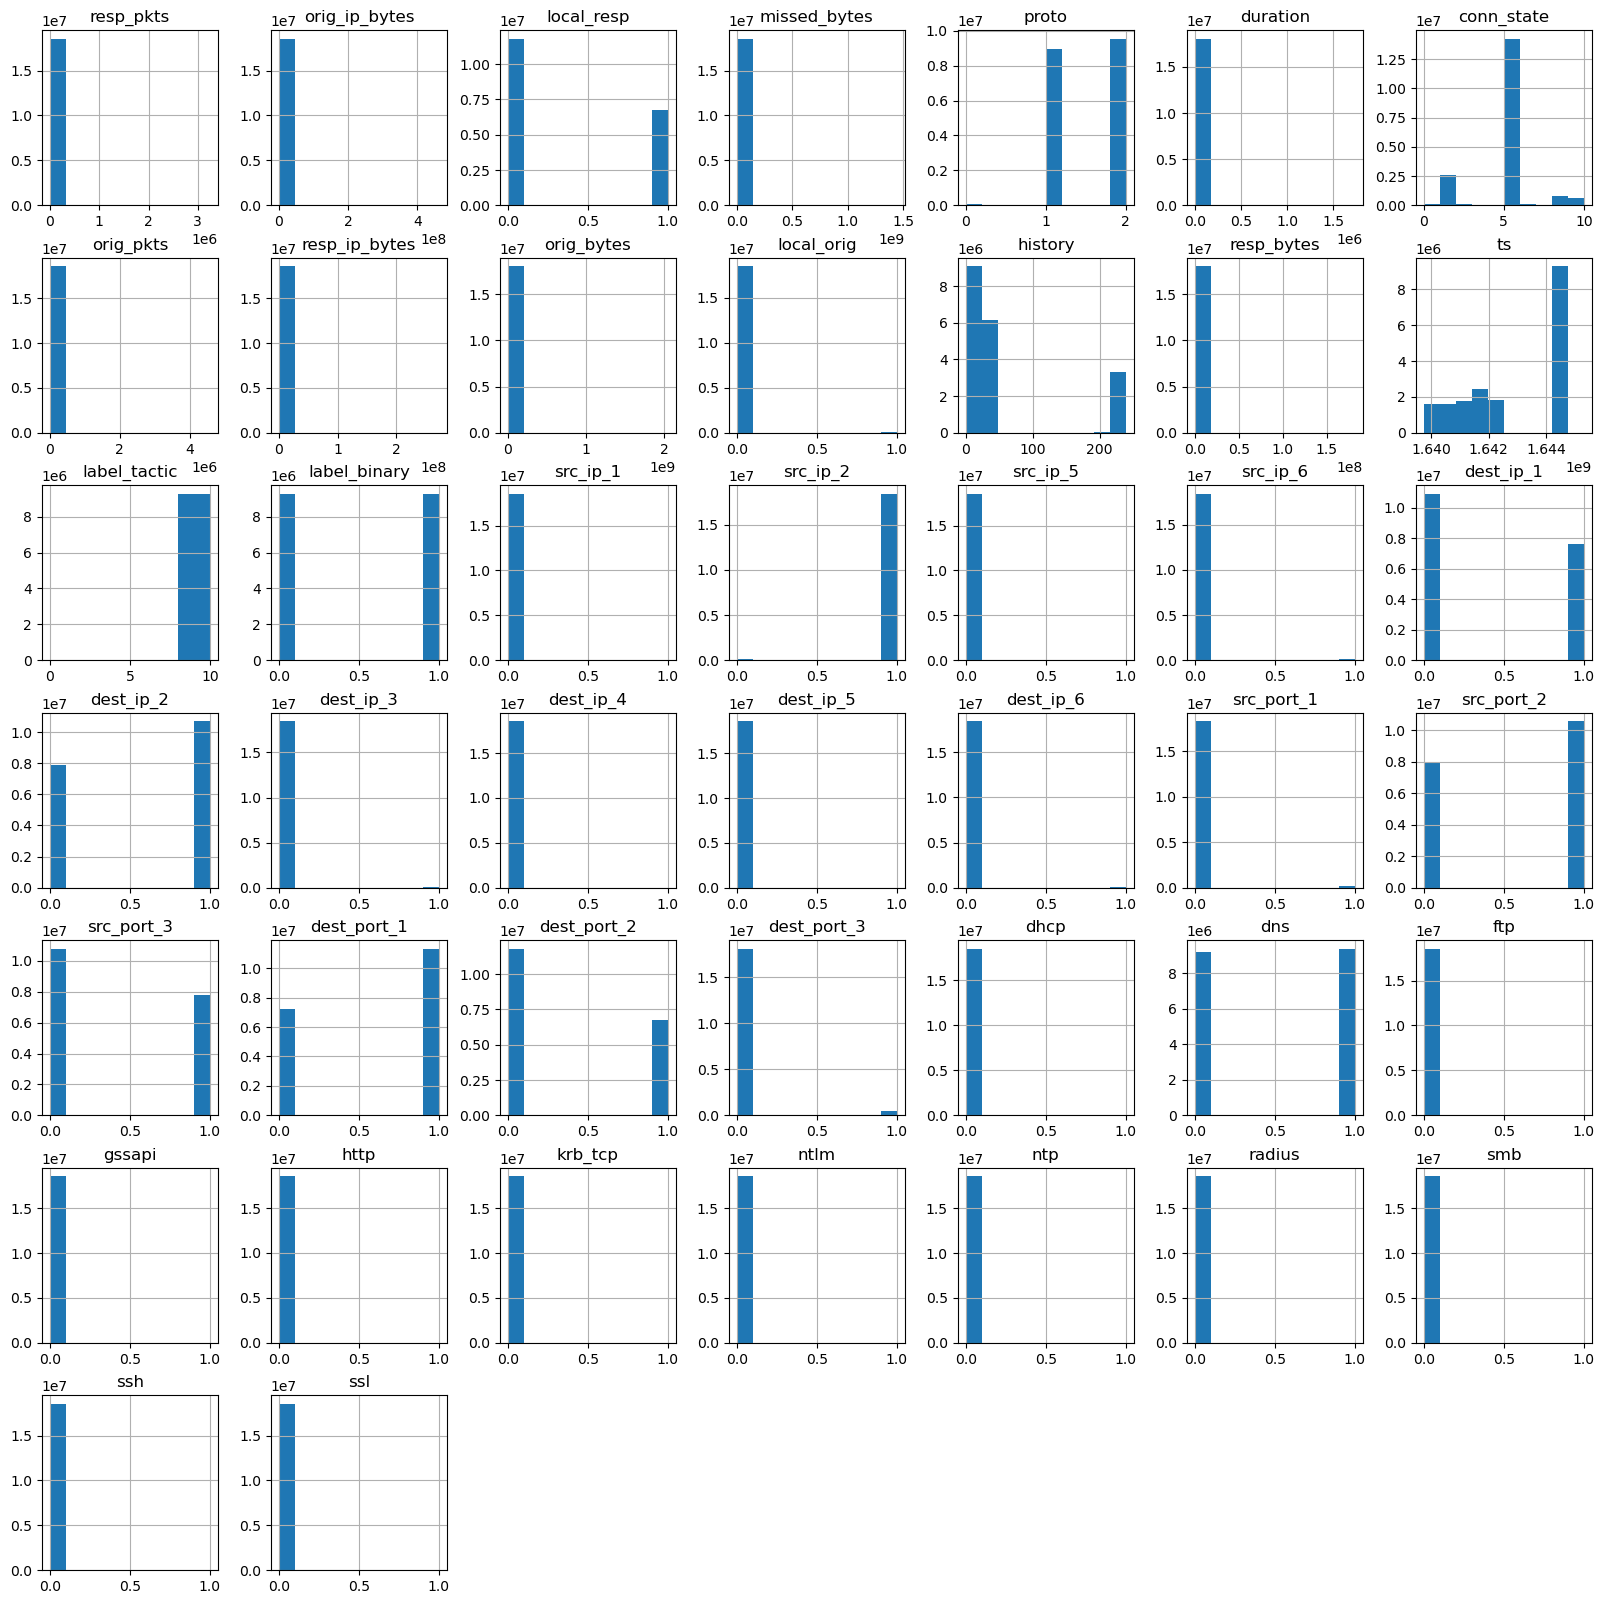

In [13]:
df.hist(figsize=(20, 20))

In [14]:
# Binning Continuous Valued Attributes
continuous_list = ['duration', 'missed_bytes', 'orig_bytes', 'orig_ip_bytes', 
                   'orig_pkts', 'resp_bytes', 'resp_ip_bytes', 'resp_pkts']

df.dropna(inplace=True)

def get_edges(column: pd.Series):
    min_val = column.min()
    mean_val = column.mean()
    stddev_val = column.std()

    if min_val >= 0:
        while mean_val - 2 * stddev_val < 0:
            mean_val += stddev_val

    edge0 = float('-inf')
    edge1 = mean_val - stddev_val * 2
    edge2 = mean_val - stddev_val
    edge3 = mean_val
    edge4 = mean_val + stddev_val
    edge5 = mean_val + stddev_val * 2
    edge6 = float('inf')
    
    edges = [edge0, edge1, edge2, edge3, edge4, edge5, edge6]

    return edges

def encode_continuous(column: pd.Series):
    edges = get_edges(column)
    return pd.cut(column, bins=edges, labels=False).astype(int)

for col in continuous_list:
    df[col] = encode_continuous(df[col])


array([[<Axes: title={'center': 'resp_pkts'}>,
        <Axes: title={'center': 'orig_ip_bytes'}>,
        <Axes: title={'center': 'local_resp'}>,
        <Axes: title={'center': 'missed_bytes'}>,
        <Axes: title={'center': 'proto'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'conn_state'}>],
       [<Axes: title={'center': 'orig_pkts'}>,
        <Axes: title={'center': 'resp_ip_bytes'}>,
        <Axes: title={'center': 'orig_bytes'}>,
        <Axes: title={'center': 'local_orig'}>,
        <Axes: title={'center': 'history'}>,
        <Axes: title={'center': 'resp_bytes'}>,
        <Axes: title={'center': 'ts'}>],
       [<Axes: title={'center': 'label_tactic'}>,
        <Axes: title={'center': 'label_binary'}>,
        <Axes: title={'center': 'src_ip_1'}>,
        <Axes: title={'center': 'src_ip_2'}>,
        <Axes: title={'center': 'src_ip_5'}>,
        <Axes: title={'center': 'src_ip_6'}>,
        <Axes: title={'center': 'dest_ip_1'}>],
      

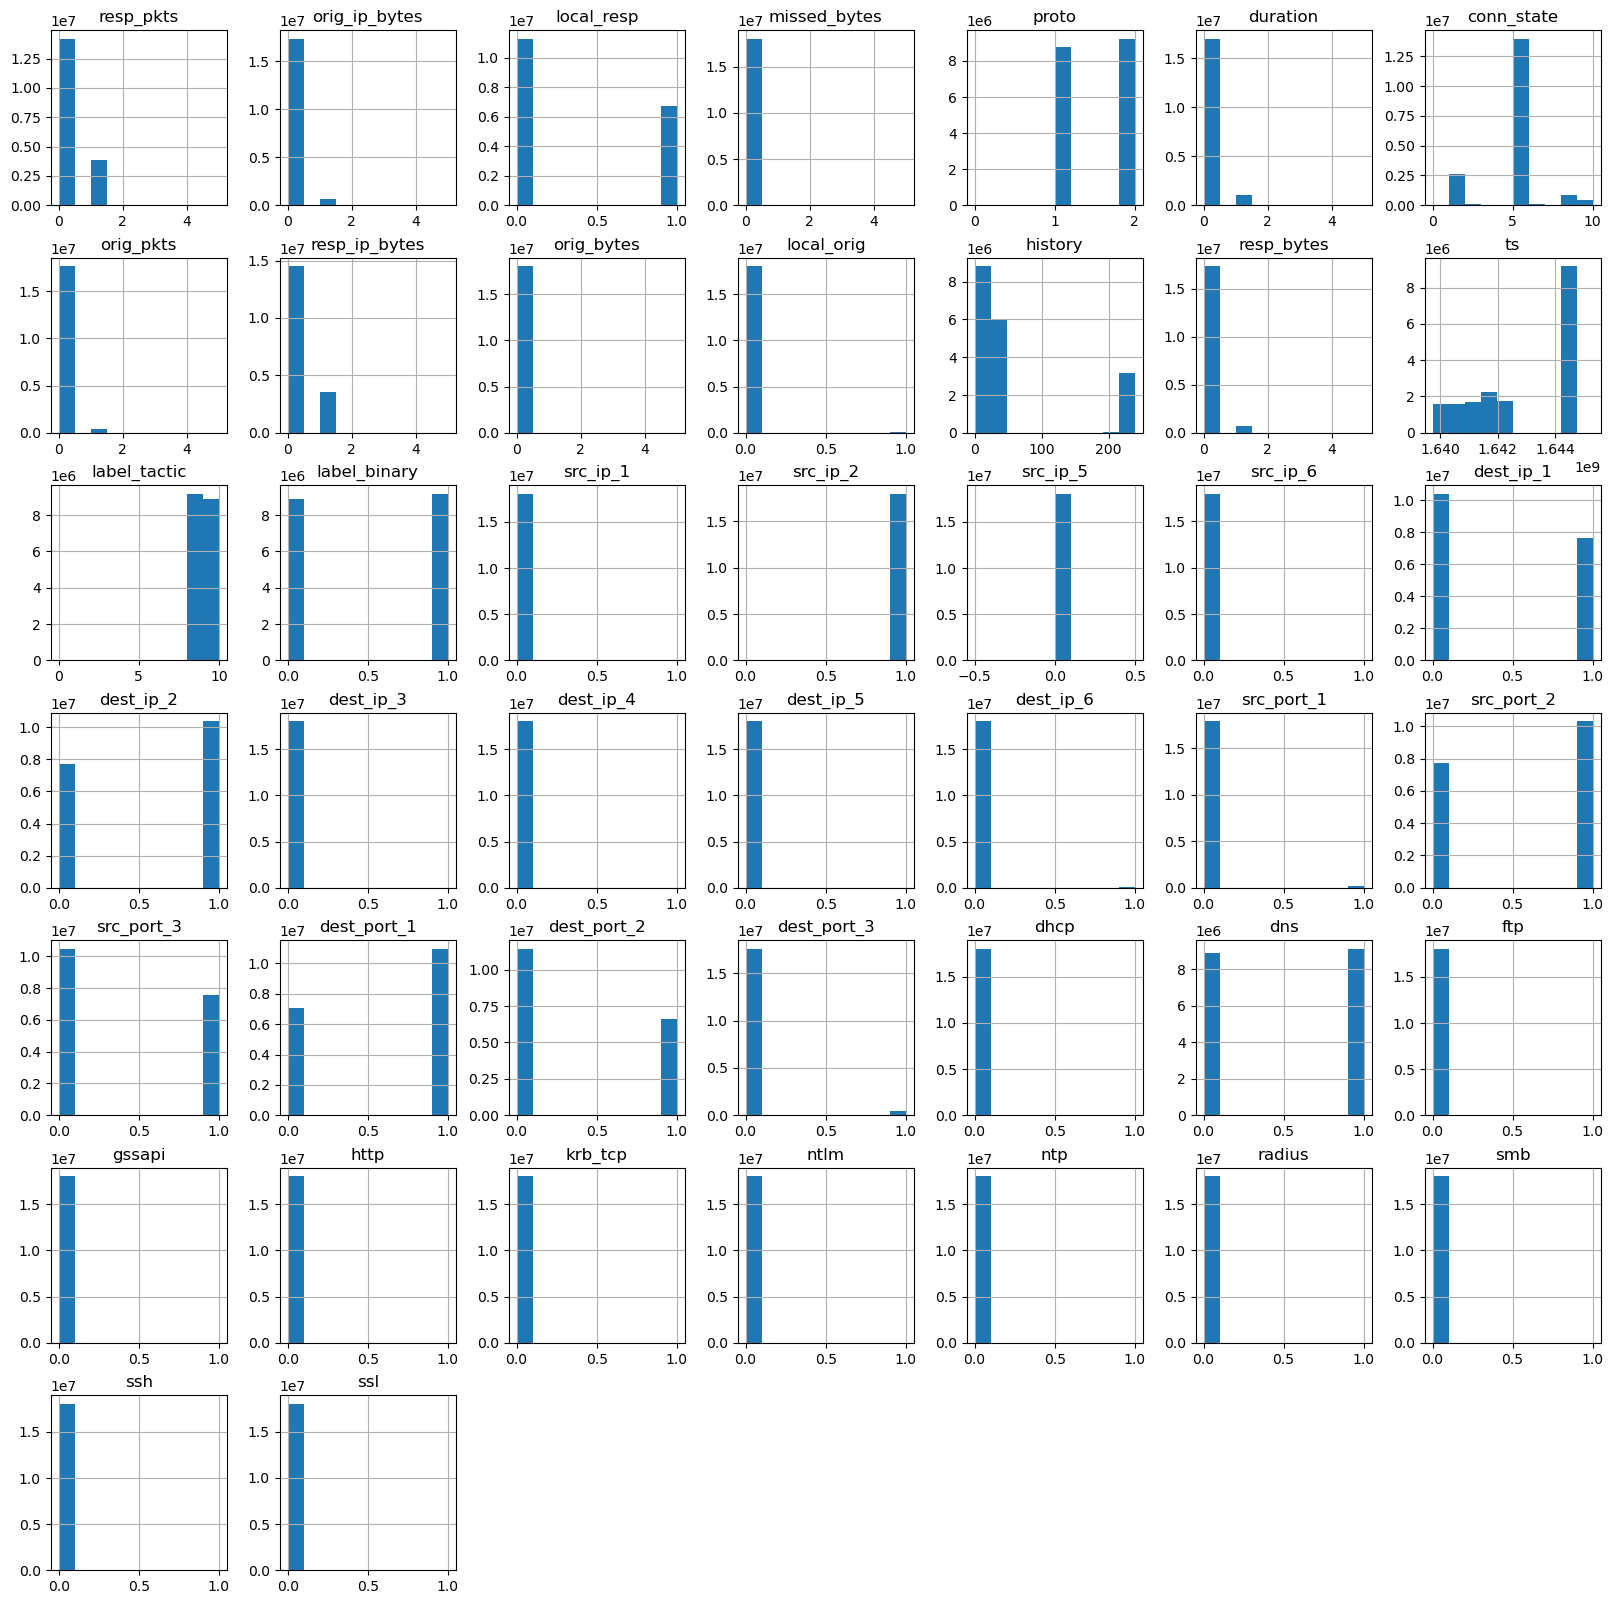

In [15]:
df.hist(figsize=(20, 20))

In [16]:
df.drop(columns=['label_tactic'], inplace=True)

## Train the models

In [17]:
df.to_parquet(path='../data/preprocessed.parquet')

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier, SGDClassifier, Perceptron
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Load your DataFrame here
# Assuming your DataFrame is named df and it contains features and target columns

# Split the DataFrame into features (X) and target (y)
df = pd.read_parquet('../data/preprocessed.parquet')
X = df.drop(columns=['label_binary'])
y = df['label_binary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Bernoulli NB': BernoulliNB(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'SGDClassifier': SGDClassifier(),
    'Perceptron': Perceptron()
}

# Initialize dictionary to store evaluation metrics
evaluation_metrics = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    start_train_time = time.time()
    batch_size = 1000  # Define your batch size
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        clf.partial_fit(X_batch, y_batch, classes=[0, 1])  # Use partial_fit for mini-batch training
        # print(f'{name}: Batch {i} Finished')
    end_train_time = time.time()
    
    start_test_time = time.time()
    y_pred = clf.predict(X_test)
    end_test_time = time.time()
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    fpr = fp / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    
    training_time = end_train_time - start_train_time
    testing_time = end_test_time - start_test_time
    print(f"{name} finished.")
    
    evaluation_metrics[name] = {
        'True Positive': tp,
        'True Negative': tn,
        'False Positive': fp,
        'False Negative': fn,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'False Positive Rate': fpr,
        'F-Measure': f1,
        'Training Time': training_time,
        'Testing Time': testing_time
    }

# Display evaluation metrics
for name, metrics in evaluation_metrics.items():
    print(f"\n{name} Metrics:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")


Bernoulli NB finished.
Passive Aggressive Classifier finished.
SGDClassifier finished.
Perceptron finished.

Bernoulli NB Metrics:
True Positive: 1835186
True Negative: 1767434
False Positive: 7979
False Negative: 0
Accuracy: 0.9977901173738762
Precision: 0.9956710332498718
Recall: 1.0
False Positive Rate: 0.004494165582881279
F-Measure: 0.997830821474079
Training Time: 30.421656131744385
Testing Time: 24.865674257278442

Passive Aggressive Classifier Metrics:
True Positive: 1835186
True Negative: 1775413
False Positive: 0
False Negative: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
False Positive Rate: 0.0
F-Measure: 1.0
Training Time: 15.241913795471191
Testing Time: 0.7426691055297852

SGDClassifier Metrics:
True Positive: 1835186
True Negative: 1775413
False Positive: 0
False Negative: 0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
False Positive Rate: 0.0
F-Measure: 1.0
Training Time: 14.106342554092407
Testing Time: 0.36278486251831055

Perceptron Metrics:
True Positive: 1835186
True N